In [1]:
import os
import numpy as np
import glob
from PIL import Image,ImageOps,ImageEnhance
import matplotlib.pyplot as plt
import torch
import matplotlib.animation
from collections import OrderedDict

from models import generators,discriminators


In [2]:
print(torch.__version__)

1.9.0


# Loading model architecture

In [56]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


netG = generators.Res_Generator(z_dim = 128, n_classes = 4,base_ch = 52
                                ,att = True,img_ch = 1,leak = 0
                                ,cond_method='conv1x1',SN=False).to(device)

# Loading checkpoint for the Artifical dataset provided by TotalEnergies

In [90]:
checkpoint = torch.load('trained_models/AR_model.pth',map_location=device)
_ = netG.load_state_dict(checkpoint['netG_state_dict'])
_=netG.eval()

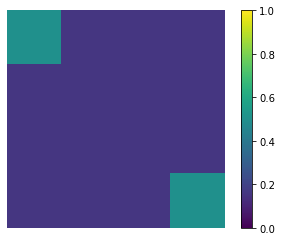

In [91]:
y = torch.tensor([0.16])
y = y.repeat(4,4)
y[0,0] = 0.5
y[-1,-1] = 0.5

y = y.unsqueeze(0).unsqueeze(0)


plt.imshow(y[0,0])
plt.colorbar()
plt.axis('off')
plt.clim(0, 1)

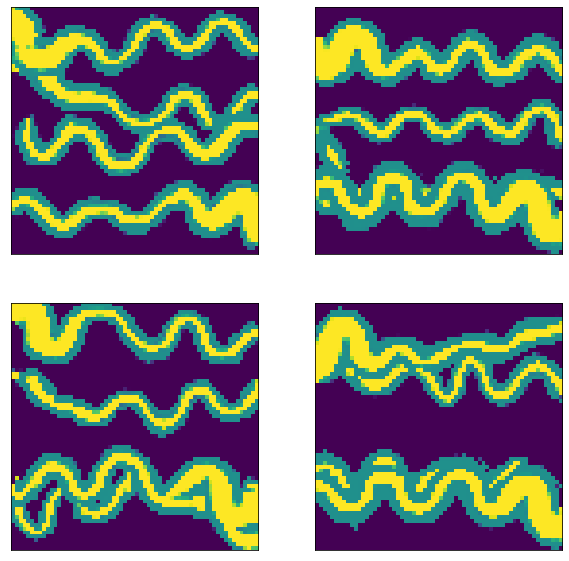

In [93]:

N = 2
with torch.no_grad():
    z = torch.randn(N**2, 128).to(device=device)
    imgs = netG(z,y.to(device=device)).cpu().squeeze(1)
    
fig2, axes = plt.subplots(N,N,figsize=(10,10))
for i,iax in enumerate( axes.flatten() ):

    _ = iax.imshow(imgs[i].numpy())

        
    iax.set_xticks([])
    iax.set_yticks([])

# Loading checkpoint for the Real masks of the Brahmaputra river

In [94]:
checkpoint = torch.load('trained_models/BR_model.pth',map_location=device) 
_ = netG.load_state_dict(checkpoint['netG_state_dict'])
_=netG.eval()

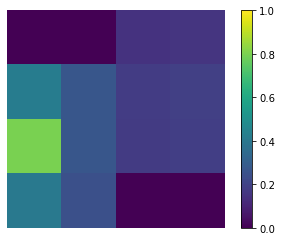

In [95]:
y = torch.tensor([[0, 0, 0.1479, 0.1560],
          [0.4206, 0.2695, 0.1770, 0.1895],
          [0.8, 0.2667, 0.1723, 0.1851],
          [0.4061, 0.2424, 0,0]]).unsqueeze(0).unsqueeze(0)

plt.imshow(y[0,0])
plt.colorbar()
plt.axis('off')
plt.clim(0, 1)

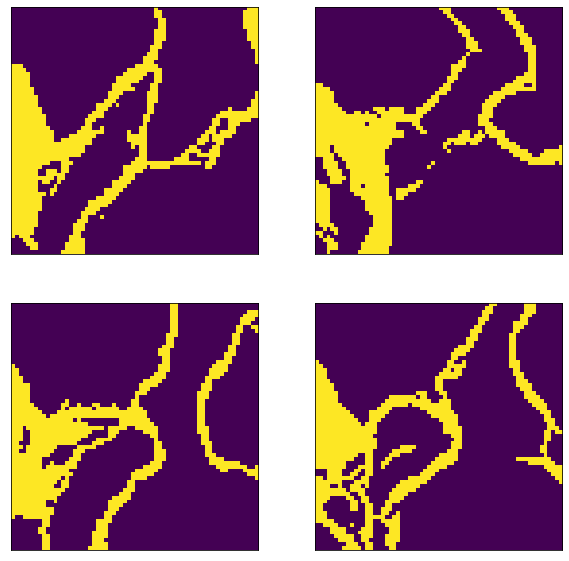

In [96]:

N = 2
with torch.no_grad():
    z = torch.randn(N**2, 128).to(device=device)
    imgs = netG(z,y.to(device=device)).cpu().squeeze(1)
    
fig2, axes = plt.subplots(N,N,figsize=(10,10))
for i,iax in enumerate( axes.flatten() ):

    _ = iax.imshow(np.round(imgs[i].numpy()*0.5+0.5))

        
    iax.set_xticks([])
    iax.set_yticks([])